In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\darjr\OneDrive\Documents\PG AI&ML\PROJECTS\predict+students+dropout+and+academic+success\data.csv'
data = pd.read_csv(r'C:\Users\darjr\OneDrive\Documents\PG AI&ML\PROJECTS\predict+students+dropout+and+academic+success\data.csv')

# Display the first few rows of the dataset 
data.head()


Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target
0  1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1  1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2  1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
3  1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [2]:
# Reload the dataset with the correct delimiter
data = pd.read_csv(r'C:\Users\darjr\OneDrive\Documents\PG AI&ML\PROJECTS\predict+students+dropout+and+academic+success\data.csv', delimiter=';')

# Display the first few rows of the dataset again to confirm proper loading
data.head()


Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [7]:
# List all column names in the DataFrame
print(data.columns)

Index(['Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'], dtype='object')


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset with the correct delimiter
file_path = r'C:\Users\darjr\OneDrive\Documents\PG AI&ML\PROJECTS\predict+students+dropout+and+academic+success\data.csv'
data = pd.read_csv(r'C:\Users\darjr\OneDrive\Documents\PG AI&ML\PROJECTS\predict+students+dropout+and+academic+success\data.csv', delimiter=';')  # Specify the delimiter here


# Encode categorical target variable
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

# Identify numerical columns (excluding the target variable)
numerical_cols = data.columns[(data.dtypes != 'object') & (data.columns != 'Target')]

# Normalize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Splitting the dataset into training and testing sets
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(accuracy)
print(classification_rep)


0.7694915254237288
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.38      0.45       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



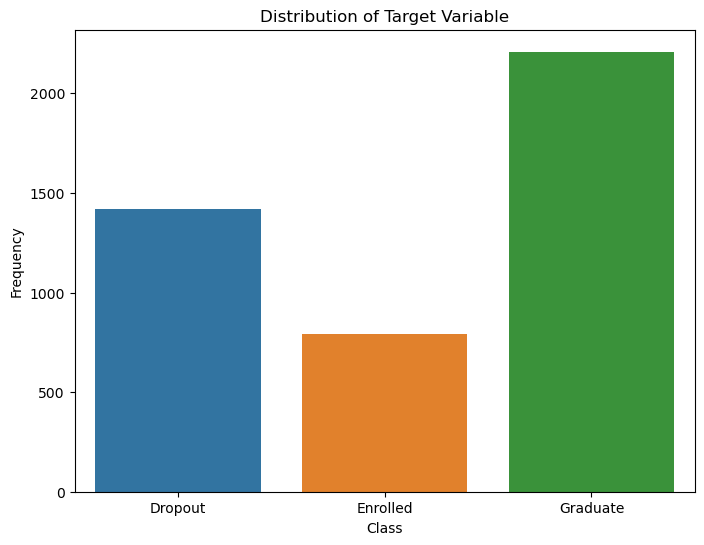

C:\Users\darjr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


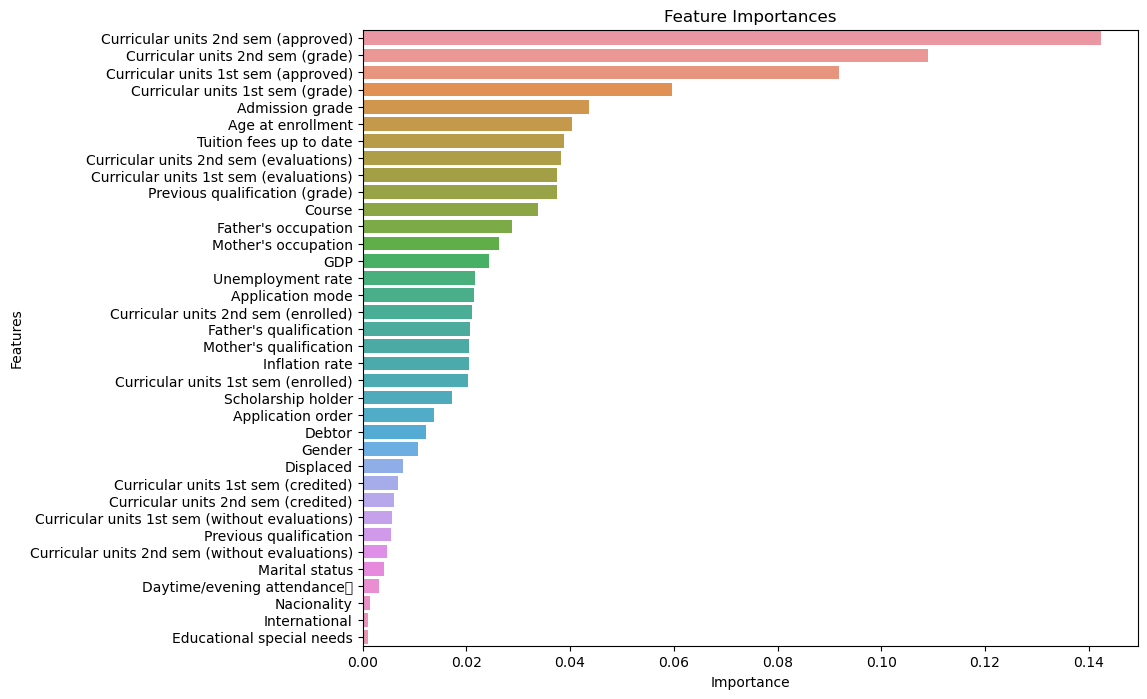

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Visualization 1: Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Target'])
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()

# Visualization 2: Feature Importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
